# Multiple Linear Regression model for bike sharing company BoomBikes

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

*  Which variables are significant in predicting the demand for shared bikes.
*  How well those variables describe the bike demands

#### Importing necessary libraries

In [1]:
# Loading required Libraries

# Required for Data Manipulation purpose
import numpy as np
import pandas as pd

# Required for Visualization purpose
import matplotlib.pyplot as plt
import seaborn as sns

# Required for Machine learning model building  purpose
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Data Sourcing

In [2]:
#Loading the dataset from csv format to pandas dataframe

bike_sharing_df = pd.read_csv('day.csv')
bike_sharing_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
#Performing generic data structure check using shape, describe, info & size
bike_sharing_df.shape

(730, 16)

In [4]:
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing_df.size

11680

#### Looking for null values in bike sharing dataframe

In [7]:
bike_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 We will skip missing value treatment here beacuse above output says all the columns have no null value

### Data Cleaning

 *instant* column consist of incremental unique value just like an row number, which I fear will not help our cause in solution hence dropping it.

In [8]:
bike_sharing_df.drop(['instant'], axis = 1, inplace = True)
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


*registered* and *casual* columns consist of value for number of users using service regularly or very first time on any given day respectively , If I look at the problem statemnt than I fear they will not help our cause in solution because we need to look for factors responsibile for demands hence dropping them.

In [9]:
bike_sharing_df.drop(['casual', 'registered'], axis = 1, inplace = True)
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data Manipulation

In [10]:
# For 'dteday' column

## Convert 'dteday' column to datetime format
bike_sharing_df['dteday'] = pd.to_datetime(bike_sharing_df['dteday'],dayfirst=True)

## Deriving "days_from_start" which indicates nth number of day
bike_sharing_df['days_from_start'] = (bike_sharing_df.dteday - pd.to_datetime('2018-01-01',format='%Y-%m-%d')).dt.days


## Removing 'dteday' column
bike_sharing_df.drop(['dteday'],axis=1,inplace=True)

In [11]:
# For 'season' column

## Converting 'season' column to categorical
bike_sharing_df.season = bike_sharing_df.season.astype('str').map({'1':'spring', '2':'summer', '3':'fall', '4':'winter'})


In [12]:
# For 'mnth' column

## Converting 'mnth' column to string name of the month
bike_sharing_df.mnth = bike_sharing_df.mnth.astype('str').map({'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul', '8':'Aug', '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'})

In [13]:
# For 'weekday' column
## Converting 'weekday' column to string name of the day
bike_sharing_df.weekday = bike_sharing_df.weekday.astype('str').map({'1':'Mon', '2':'Tue', '3':'Wed', '4':'Thu', '5':'Fri', '6':'Sat', '0':'Sun'})

## Deriving 'weekend' column with values as 1 for weekend & 0 for weekday
bike_sharing_df['weekend'] = bike_sharing_df.weekday.map({'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':1, 'Sun':1})

In [14]:
# For 'weathersit' column
## Converting 'weathersit' column to string name of the weather situation
	#  weathersit : 
	# 	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	# 	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	# 	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	# 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike_sharing_df.weathersit = bike_sharing_df.weathersit.astype('str').map({'1':'Clear', '2':'Cloudy', '3':'Rainy', '4':'Storm'})

In [15]:
# FOr 'temp','atemp','hum','windspeed' columns
## Rounding the values of 'temp','atemp','hum','windspeed' columns to 3 decimal places
bike_sharing_df[['temp','atemp','hum','windspeed']] = bike_sharing_df[['temp','atemp','hum','windspeed']].round(3)

Bird's view of current bike sharing datafame after performing above deriving operations

In [16]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_from_start,weekend
0,spring,0,Jan,0,Sat,0,Cloudy,14.111,18.181,80.583,10.750,985,0,1
1,spring,0,Jan,0,Sun,0,Cloudy,14.903,17.687,69.609,16.652,801,1,1
2,spring,0,Jan,0,Mon,1,Clear,8.051,9.470,43.727,16.637,1349,2,0
3,spring,0,Jan,0,Tue,1,Clear,8.200,10.606,59.044,10.740,1562,3,0
4,spring,0,Jan,0,Wed,1,Clear,9.305,11.464,43.696,12.522,1600,4,0


### Data Visualization

Looking for correlation amongst numerical features with respect to *cnt* using pairplot 

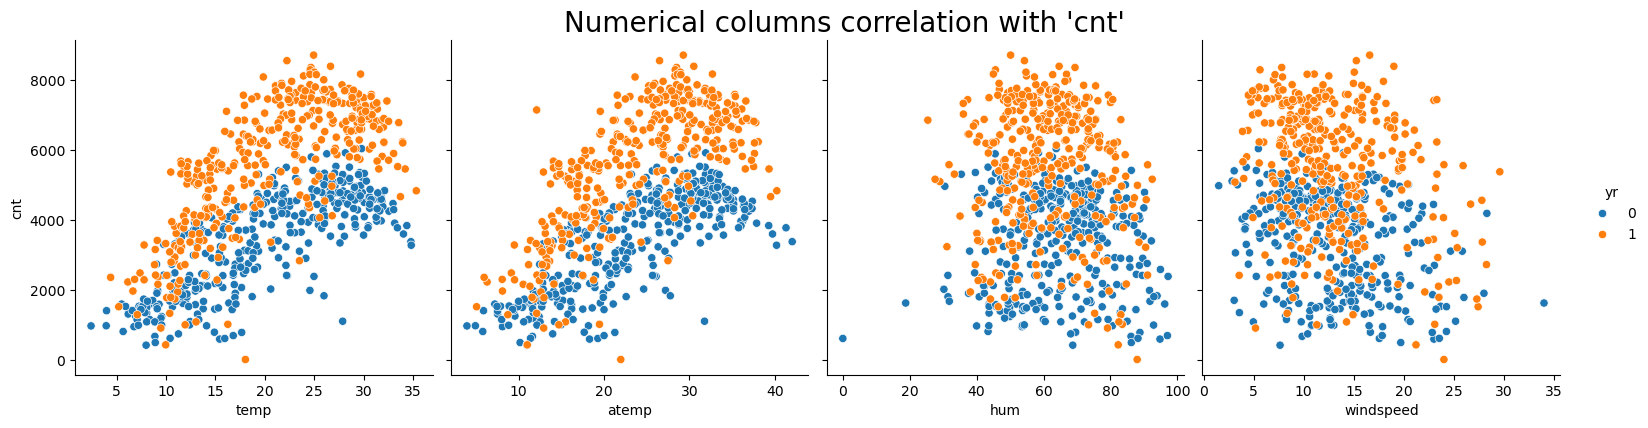

In [17]:
num_cols=['temp','atemp','hum','windspeed']
sns.pairplot(data=bike_sharing_df,x_vars=num_cols,y_vars='cnt',diag_kind='kde',hue='yr',palette='tab10',size=4)
plt.title("Numerical columns correlation with 'cnt'",fontsize=20,color='black',x=-1.0)
plt.show()

 Checking pairplot of Numerical columns to each other for correlation


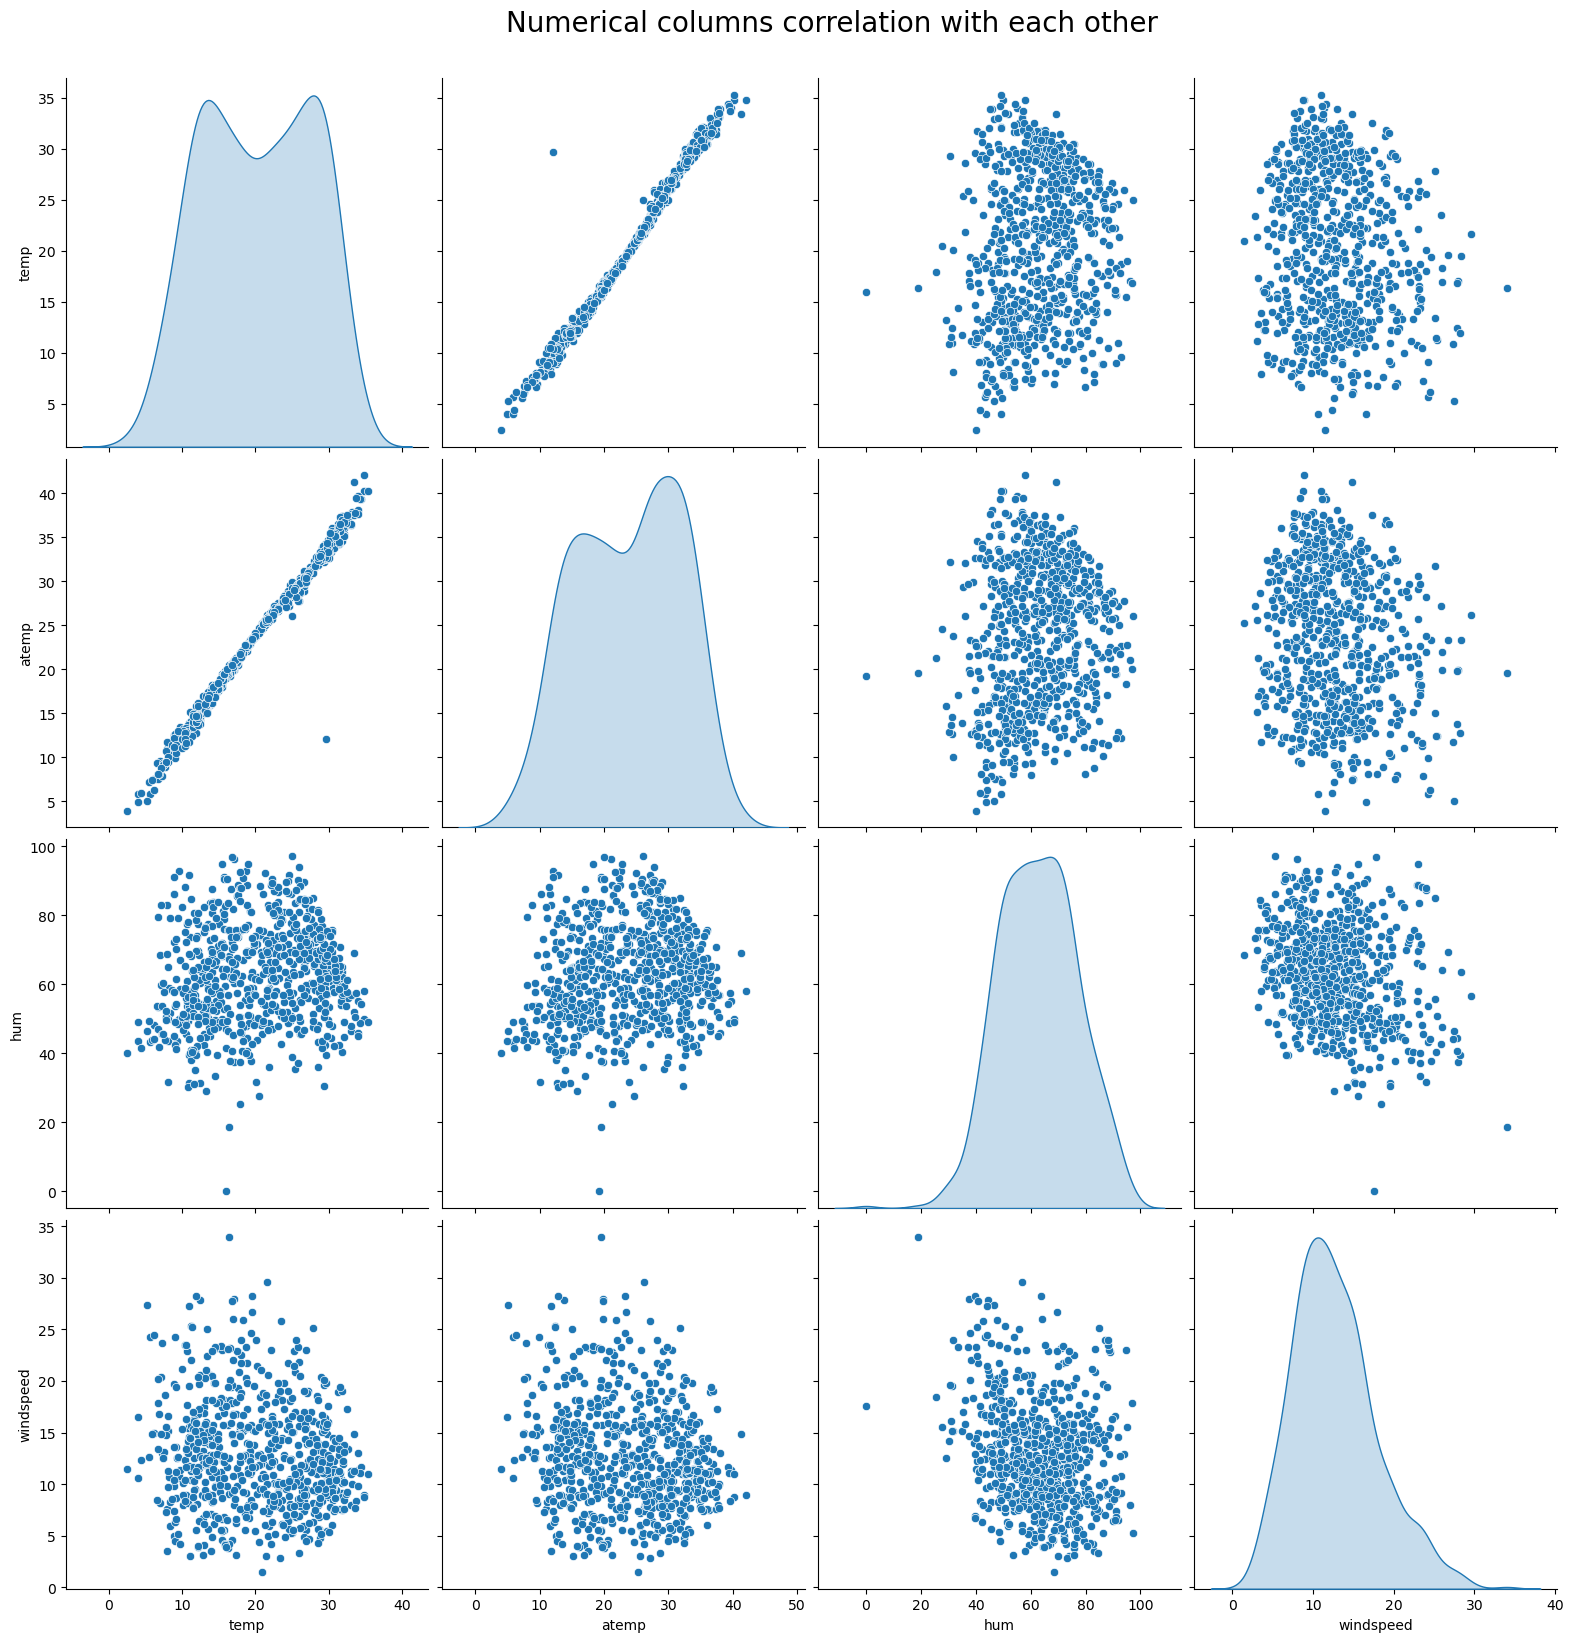

In [18]:
sns.pairplot(data=bike_sharing_df,x_vars=num_cols,y_vars=num_cols,diag_kind='kde',palette='tab10',size=4)
plt.title("Numerical columns correlation with each other",fontsize=20,color='black',x=-1.0,y=4.2)
plt.show()

Combining categorical columns

In [19]:
cat_cols=['season','yr','mnth','holiday','weekday','weekend','workingday','weathersit']

Plotting boxplot for Categories columns to understanbd dataspread

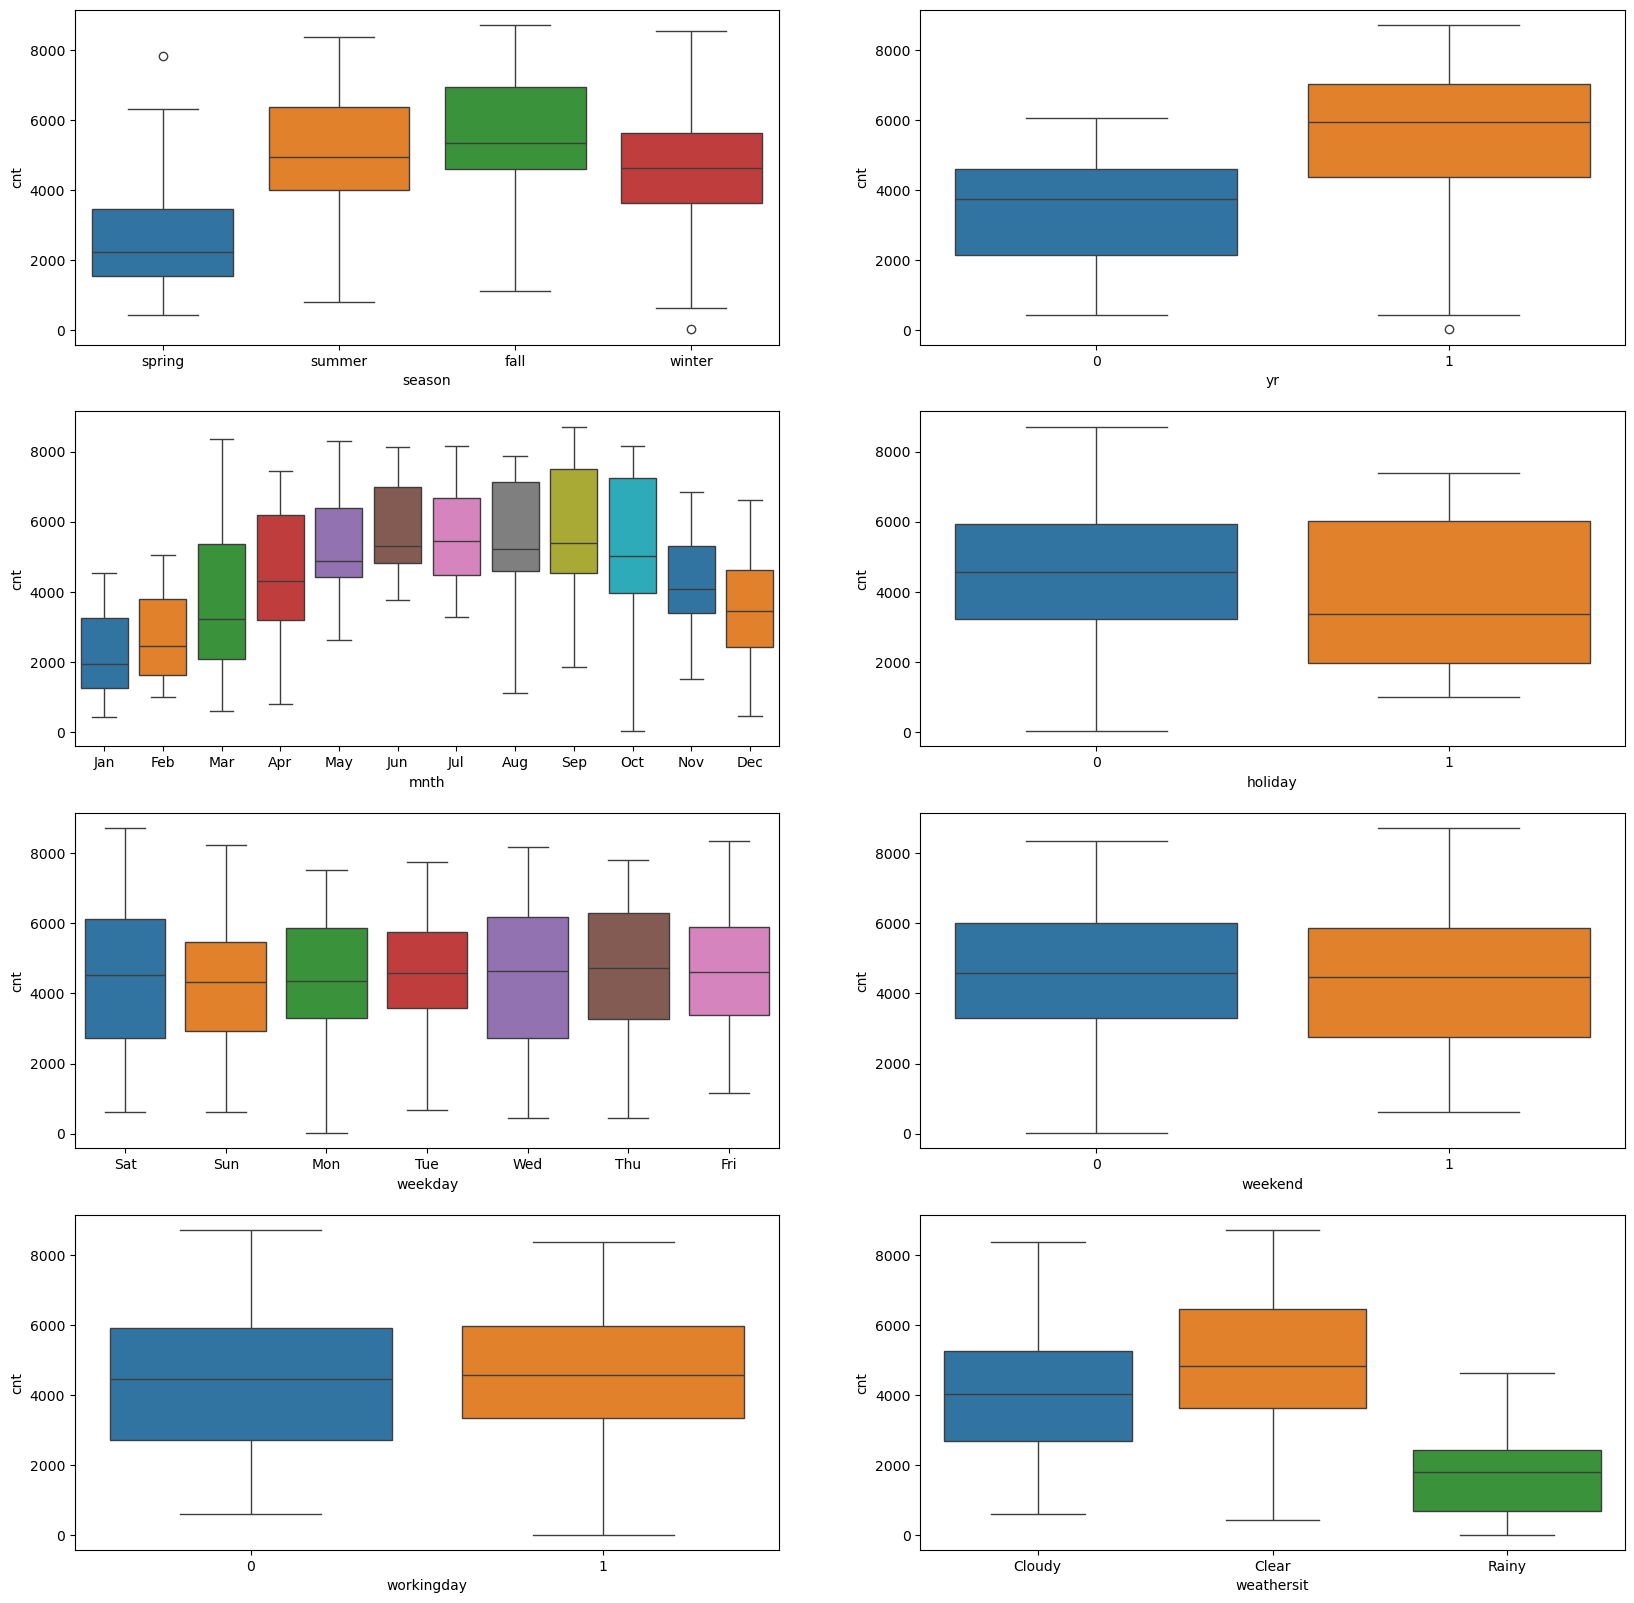

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt',data=bike_sharing_df,palette='tab10')
plt.subplot(4,2,2)
sns.boxplot(x='yr',y='cnt',data=bike_sharing_df,palette='tab10')
plt.subplot(4,2,3)
sns.boxplot(x='mnth',y='cnt',data=bike_sharing_df,palette='tab10')
plt.subplot(4,2,4)
sns.boxplot(x='holiday',y='cnt',data=bike_sharing_df,palette='tab10')
plt.subplot(4,2,5)
sns.boxplot(x='weekday',y='cnt',data=bike_sharing_df,palette='tab10')
plt.subplot(4,2,6)
sns.boxplot(x='weekend',y='cnt',data=bike_sharing_df,palette='tab10')
plt.subplot(4,2,7)
sns.boxplot(x='workingday',y='cnt',data=bike_sharing_df,palette='tab10')
plt.subplot(4,2,8)
sns.boxplot(x='weathersit',y='cnt',data=bike_sharing_df,palette='tab10')
plt.show()

Correlation between days_from_start and cnt column

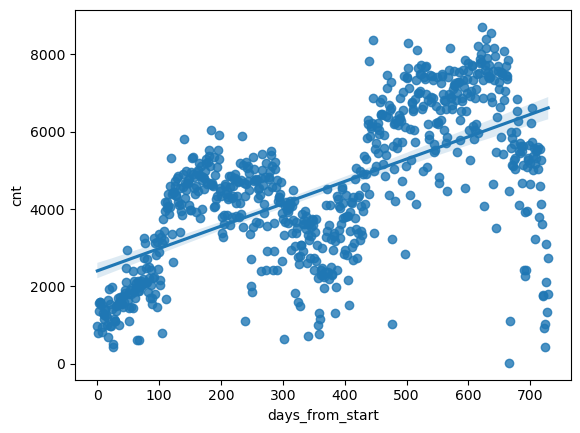

In [21]:
sns.regplot(x='days_from_start',y='cnt',data=bike_sharing_df)
plt.show()

Correlation of all data


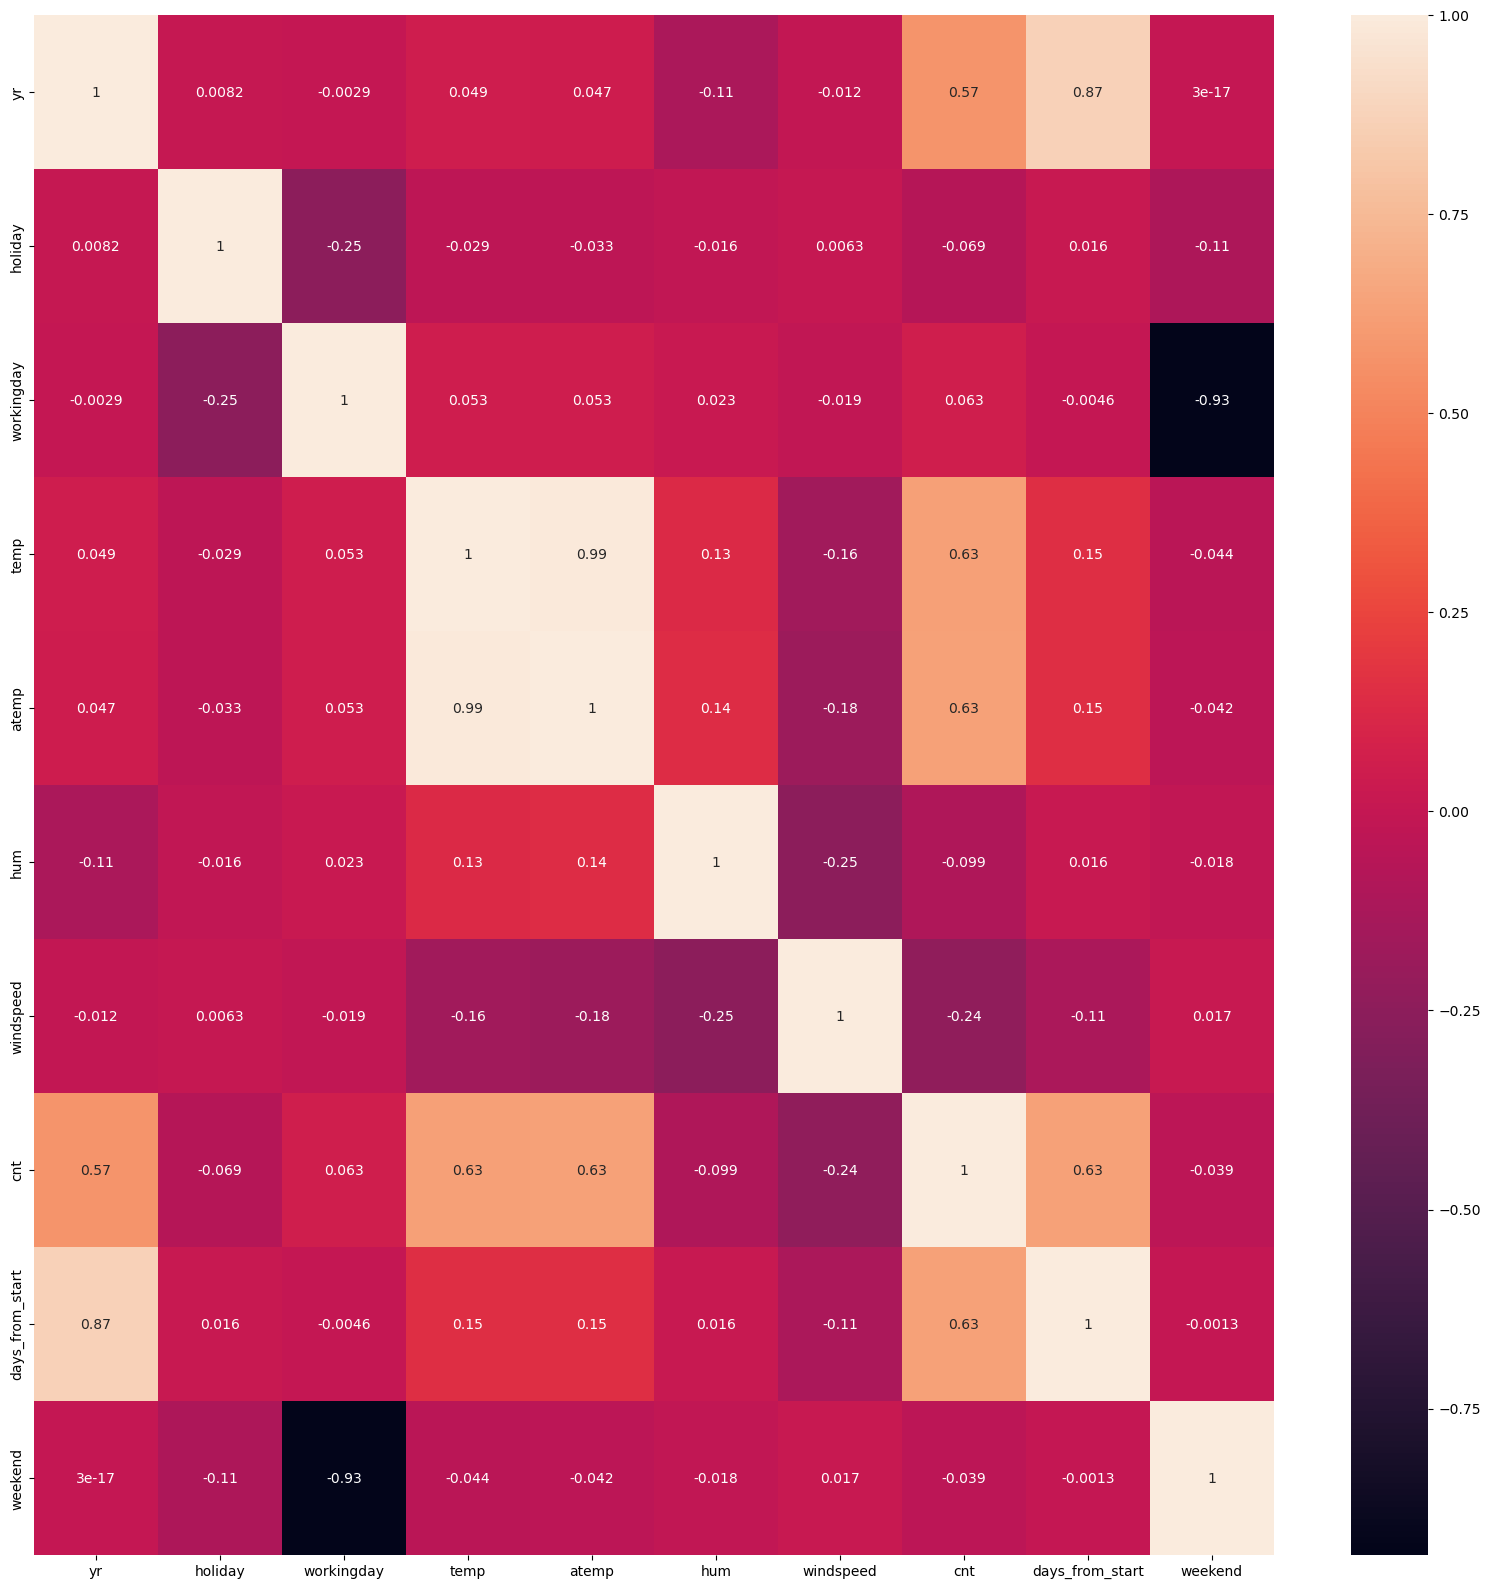

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(bike_sharing_df.select_dtypes(include=['int64', 'int32', 'float64']).corr(),annot=True)
plt.show()

In [23]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_from_start,weekend
0,spring,0,Jan,0,Sat,0,Cloudy,14.111,18.181,80.583,10.750,985,0,1
1,spring,0,Jan,0,Sun,0,Cloudy,14.903,17.687,69.609,16.652,801,1,1
2,spring,0,Jan,0,Mon,1,Clear,8.051,9.470,43.727,16.637,1349,2,0
3,spring,0,Jan,0,Tue,1,Clear,8.200,10.606,59.044,10.740,1562,3,0
4,spring,0,Jan,0,Wed,1,Clear,9.305,11.464,43.696,12.522,1600,4,0


### Pre-processing Steps


#### Dummy Variable Creation (One Hot Encoding):
Wherever we have more than 2 categories in categorical features, we need to create dummies for them

In [24]:
bike_sharing_df[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
weekend        2
workingday     2
weathersit     3
dtype: int64

In [25]:
# Dummy variables for 'season' column
bike_sharing_df = pd.get_dummies(bike_sharing_df,columns=['season'],drop_first=True, dtype=int)

# Dummy variables for 'mnth' column
bike_sharing_df = pd.get_dummies(bike_sharing_df,columns=['mnth'],drop_first=True, dtype=int)

# Dummy variables for 'weekday' column
bike_sharing_df = pd.get_dummies(bike_sharing_df,columns=['weekday'],drop_first=True, dtype=int)

# Dummy variables for 'weathersit' column
bike_sharing_df = pd.get_dummies(bike_sharing_df,columns=['weathersit'],drop_first=True, dtype=int)


In [26]:
# First 5 rows of the data
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_from_start,weekend,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
0,0,0,0,14.111,18.181,80.583,10.750,985,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.903,17.687,69.609,16.652,801,1,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.051,9.470,43.727,16.637,1349,2,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200,10.606,59.044,10.740,1562,3,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305,11.464,43.696,12.522,1600,4,0,...,0,0,0,0,0,0,0,1,0,0


### Train-Test Split

Splitting the data into 2 sets, i.e. one is training set & another test set

In [27]:
x = bike_sharing_df.drop(["cnt"], axis = 1)
y = bike_sharing_df["cnt"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [29]:
print(x_train.shape)
print(x_test.shape)

(511, 31)
(219, 31)


### Scaling

Performaning scaling using Standard scaler

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)     # As test data is unseen data we can't fit on it

In [31]:
x_test

array([[-1.01777039,  6.18932083, -1.44809174, ..., -0.43401854,
         1.37964093, -0.17390209],
       [ 0.98253988, -0.16156862,  0.69056398, ...,  2.30404904,
        -0.72482628, -0.17390209],
       [-1.01777039, -0.16156862,  0.69056398, ..., -0.43401854,
         1.37964093, -0.17390209],
       ...,
       [-1.01777039, -0.16156862, -1.44809174, ..., -0.43401854,
        -0.72482628, -0.17390209],
       [ 0.98253988, -0.16156862,  0.69056398, ...,  2.30404904,
         1.37964093, -0.17390209],
       [-1.01777039, -0.16156862,  0.69056398, ..., -0.43401854,
        -0.72482628, -0.17390209]])

In [32]:
x_train_df = pd.DataFrame(x_train, columns = x.columns)
x_test_df = pd.DataFrame(x_test, columns = x.columns)

In [33]:
x_train_df.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_from_start,weekend,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rainy
0,0.98254,-0.161569,0.690564,-0.121944,-0.056643,-0.514995,-0.118272,1.358819,-0.650691,-0.566051,...,3.257858,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,2.552392,-0.434019,-0.724826,-0.173902
1,0.98254,-0.161569,0.690564,1.232348,1.194485,0.517199,-0.331460,0.991392,-0.650691,-0.566051,...,-0.306950,-0.295354,-0.421212,-0.427633,-0.408248,-0.391789,2.552392,-0.434019,-0.724826,-0.173902


### Feature Selection

Ideally number of feature to be selected should be somewhere from 8-20 but in our case we are selecting 15 to see what kind of results we get

In [34]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 15) 

In [35]:
selector = selector.fit(x_train_df, y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True,  True])

In [36]:
selected_features = x_train_df.columns[selector.support_]
print(selected_features)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_from_start',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sun', 'weathersit_Cloudy',
       'weathersit_Rainy'],
      dtype='object')


In [37]:
x_train = x_train_df[selected_features]
x_test = x_test_df[selected_features]

### Modelling

In [38]:
x_train_sm = sm.add_constant(x_train)   #X_train_sm["const"] = 1
x_test_sm = sm.add_constant(x_test)

In [39]:
model1 = sm.OLS(np.array(y_train), x_train_sm)   # Ordinary Least Squares
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.03e-191
Time:                        17:23:59   Log-Likelihood:                -4114.4
No. Observations:                 511   AIC:                             8261.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4491.3033     34.140    131.557      0.000    4424.227    4558.380
yr                 1160.1745    131.446      8.826      0.000     901.914    1418.435
holiday            -140.7943     34.537     -4.077      0.000    -208.651     -72.937
temp                995.1393     67.408     14.763      0.000     862.698    1127.581
hum                -193.5394     47.540     -4.071      0.000    -286.944    -100.134
windspeed          -273.9493     37.530     -7.299      0.000    -347.687    -200.212
days_from_start    -182.3883    146.707     -1.243      0.214    -470.633     105.856
season_spring      -234.6373     85.570     -2.742      0.006    -402.763     -66.512
season_summer       151.3780     63.835      2.371      0.018      25.957     276.799
season_winter       386.2885     68.952      5.602      0.000     250.814     521.763
mnth_Jan           -107.6740     46.725     -2.304      0.022    -199.478     -15.870
mnth_Jul           -127.7617     41.941     -3.046      0.002    -210.167     -45.356
mnth_Sep            194.5829     38.936      4.998      0.000     118.083     271.082
weekday_Sun        -139.3850     34.474     -4.043      0.000    -207.118     -71.652
weathersit_Cloudy  -237.1209     42.888     -5.529      0.000    -321.385    -152.857
weathersit_Rainy   -366.9956     38.323     -9.576      0.000    -442.290    -291.701
==============================================================================
Omnibus:                       62.413   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.339
Skew:                          -0.631   Prob(JB):                     3.06e-34
Kurtosis:                       5.378   Cond. No.                         9.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Despite R square been 84.9% which is significant, we will remove the columns with p-value greater than 0.05 in iterative fashion, once they are lower than 0.05 we will take VIF as a secondary criterion.

##### Acceptable Range for p-values is < 0.05
##### Acceptable Range for VIF is < 5


Since for above model1 we have p-value less than 0.05 for all the features hence go with VIF value below:

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = x_train_sm.columns

vif_data["VIF"] = [variance_inflation_factor(x_train_sm.values, i) 
                   for i in range(len(x_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,1.000000
1,yr,14.824297
2,holiday,1.023404
3,temp,3.898576
4,hum,1.939095
5,windspeed,1.208471
6,days_from_start,18.466382
7,season_spring,6.282402
8,season_summer,3.496251
9,season_winter,4.079168


Here we can see for column 'days_from_start' has VIF value of 18.466382 which is greater than 5 hence drop this feature below & re-modelling

In [41]:
x_train_sm = x_train_sm.drop("days_from_start", axis = 1)
x_test_sm = x_test_sm.drop("days_from_start", axis = 1)

In [42]:
model2 = sm.OLS(np.array(y_train), x_train_sm)  #OLS
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.55e-192
Time:                        17:24:18   Log-Likelihood:                -4115.2
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     496   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4491.3033     34.158    131.484      0.000    4424.190    4558.416
yr                 1002.5744     34.773     28.832      0.000     934.254    1070.895
holiday            -142.4022     34.532     -4.124      0.000    -210.248     -74.556
temp                999.6740     67.346     14.844      0.000     867.355    1131.993
hum                -200.5068     47.234     -4.245      0.000    -293.311    -107.703
windspeed          -273.2255     37.546     -7.277      0.000    -346.994    -199.457
season_spring      -188.2274     77.040     -2.443      0.015    -339.593     -36.862
season_summer       190.4168     55.608      3.424      0.001      81.160     299.674
season_winter       356.9280     64.817      5.507      0.000     229.579     484.277
mnth_Jan            -84.2177     42.770     -1.969      0.049    -168.250      -0.186
mnth_Jul           -121.9462     41.703     -2.924      0.004    -203.882     -40.010
mnth_Sep            192.0344     38.903      4.936      0.000     115.599     268.470
weekday_Sun        -138.7684     34.489     -4.024      0.000    -206.531     -71.006
weathersit_Cloudy  -233.1675     42.793     -5.449      0.000    -317.246    -149.089
weathersit_Rainy   -363.1537     38.219     -9.502      0.000    -438.244    -288.063
==============================================================================
Omnibus:                       62.794   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.075
Skew:                          -0.633   Prob(JB):                     1.28e-34
Kurtosis:                       5.393   Cond. No.                         5.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = x_train_sm.columns

vif_data["VIF"] = [variance_inflation_factor(x_train_sm.values, i) 
                   for i in range(len(x_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.036304
2,holiday,1.021968
3,temp,3.887161
4,hum,1.912147
5,windspeed,1.208181
6,season_spring,5.086738
7,season_summer,2.650231
8,season_winter,3.600632
9,mnth_Jan,1.567748


Here we can see for column 'season_spring' has VIF value of 5.086738 which is greater than 5 hence drop this feature below & re-modelling

In [44]:
x_train_sm = x_train_sm.drop("season_spring", axis = 1)
x_test_sm = x_test_sm.drop("season_spring", axis = 1)

In [45]:
model3 = sm.OLS(np.array(y_train), x_train_sm)  #OLS
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.01e-192
Time:                        17:24:32   Log-Likelihood:                -4118.3
No. Observations:                 511   AIC:                             8265.
Df Residuals:                     497   BIC:                             8324.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4491.3033     34.329    130.832      0.000    4423.856    4558.751
yr                  997.6089     34.887     28.596      0.000     929.065    1066.152
holiday            -144.8060     34.690     -4.174      0.000    -212.963     -76.649
temp               1112.3380     49.328     22.550      0.000    1015.421    1209.255
hum                -212.4803     47.214     -4.500      0.000    -305.244    -119.717
windspeed          -283.8038     37.482     -7.572      0.000    -357.446    -210.162
season_summer       283.1647     40.838      6.934      0.000     202.928     363.401
season_winter       477.0212     42.462     11.234      0.000     393.594     560.448
mnth_Jan            -96.0523     42.706     -2.249      0.025    -179.960     -12.145
mnth_Jul           -102.0844     41.107     -2.483      0.013    -182.849     -21.320
mnth_Sep            218.8248     37.512      5.833      0.000     145.123     292.526
weekday_Sun        -139.8040     34.658     -4.034      0.000    -207.899     -71.709
weathersit_Cloudy  -224.2329     42.849     -5.233      0.000    -308.421    -140.045
weathersit_Rainy   -357.1103     38.329     -9.317      0.000    -432.417    -281.804
==============================================================================
Omnibus:                       57.542   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.726
Skew:                          -0.619   Prob(JB):                     1.84e-28
Kurtosis:                       5.114   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = x_train_sm.columns

vif_data["VIF"] = [variance_inflation_factor(x_train_sm.values, i) 
                   for i in range(len(x_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.032764
2,holiday,1.021139
3,temp,2.064759
4,hum,1.891563
5,windspeed,1.192115
6,season_summer,1.415188
7,season_winter,1.529964
8,mnth_Jan,1.547640
9,mnth_Jul,1.433864


#### This model(res3) has both low P-values and low VIFs, all of which are within the acceptable range.

In [47]:
y_train_pred = res3.predict(x_train_sm)
y_test_pred = res3.predict(x_test_sm)
residuals = y_train_pred - np.array(y_train)


### Lets Validate the assumptions of Linear Regression:

 ##### *Linear Relationship*
 ##### *Homoscedasticity*
 ##### *Absence of Multicollinearity*
 ##### *Independence of residuals (absence of auto-correlation)*
 ##### *Residuals are normally distributed*

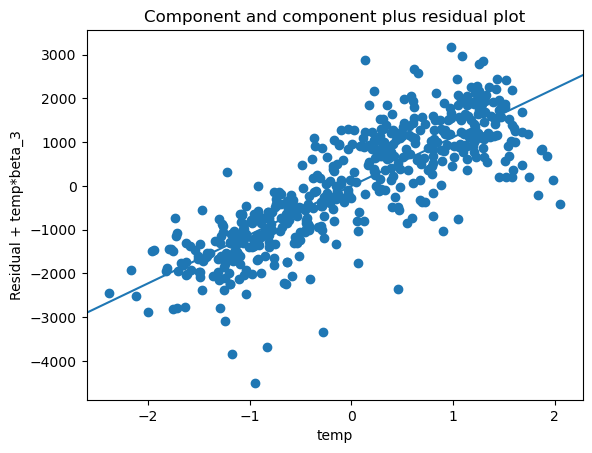

In [48]:
# Confirming linear relationship 
sm.graphics.plot_ccpr(res3, 'temp')
plt.show()

### The CCPR plot allows us to assess the impact of a single regressor on the response variable while accounting for the effects of the other independent variables. It shows that the relationship between the independent variables and the response variable is linear.


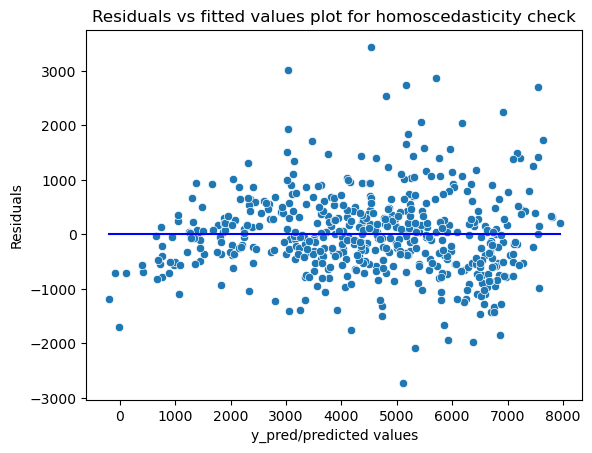

In [49]:
# Confirming linear Homoscedasticity
p = sns.scatterplot(x=y_train_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[min(y_train_pred), max(y_train_pred)],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

### Homoscedasticity is present since the variance of the residuals are almost constant.


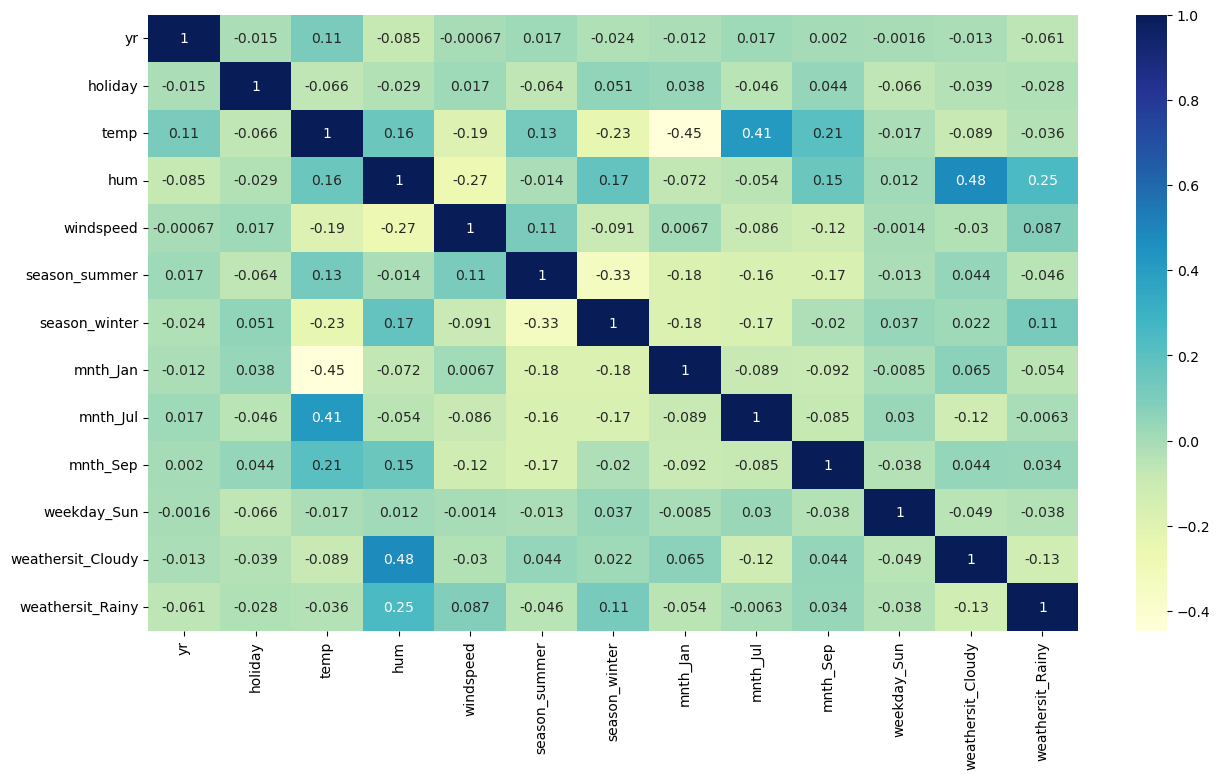

In [50]:
# Confirming Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(x_train_sm.drop('const',axis=1).corr(),annot=True, cmap='YlGnBu')
plt.show()

### As you can see independent variables are not highly correlated with each other.

In [51]:
print('The Durbin-Watson value for Final Model is',round(sm.stats.stattools.durbin_watson((np.array(y_train) - y_train_pred)),4))

The Durbin-Watson value for Final Model is 2.0858


### The Durbin-Watson statistic ranges from 0 to 4, with a value close to 2 indicating non-autocorrelation, a value near 0 suggesting positive autocorrelation, and a value near 4 indicating negative autocorrelation. In this case, the statistic is extremely close to 2, which confirms non-autocorrelation.


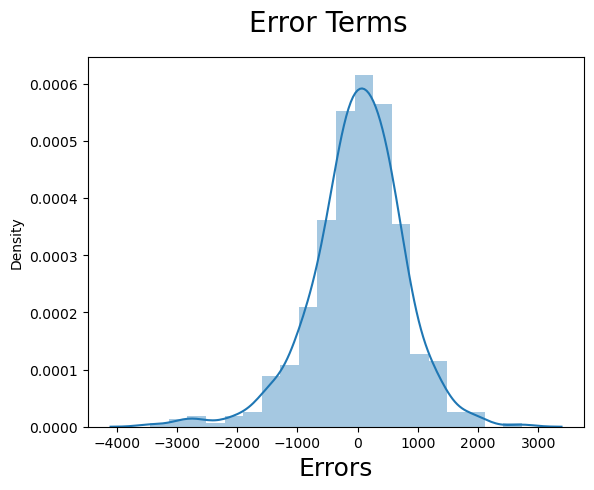

In [52]:
# Checking for normal distribution of residuals
fig = plt.figure()
sns.distplot(np.array(y_train) - np.array(y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)     
plt.show()

The residuals are normally distributed thus we can say that the model follows all assumptions.


In [53]:

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("The R-Squared score for Train is:", round(r2_train, 3), "The R-Squared score for Test is:", round(r2_test, 3))

The R-Squared score for Train is: 0.846 The R-Squared score for Test is: 0.804


# Conclusion:

- Data suggests days with low wind speed is having higher bike rentals (Good days for business)
- Amongst all months in a year, September is the best month for rentals (Highest demand is observed)
- Summer & Winter see higher bike rentals, making these seasons ideal for marketing promotions
- In the month of January & July drop in demand is observed hence recommended not to conduct promotions this time
- Rainy & cloudy environment witness drop in demand for rentals
- With increase in temperature(until approx 35 degree Celsius) demand for bike rentals also increase 
- Overall Bike rentals are expected to grow year on year(YOY)